In [14]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

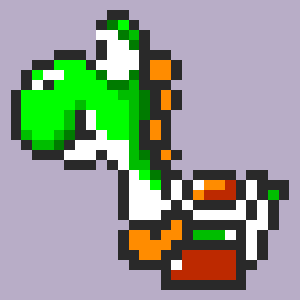

In [15]:
pixels = np.array(Image.open('yoshi.png'))
Image.fromarray(pixels).resize((300,300), Image.NEAREST)

In [16]:
palette =  list(set(tuple(x) for x in pixels.reshape(-1, 3)))

In [17]:
reverse_palette = {c:i for i, c in enumerate(palette)}

In [18]:
h, w = pixels.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels.reshape(-1,3)])

In [19]:
X = X.astype('float64')

In [20]:
X=np.concatenate([X, X+[.1,.1], X+[.1,-.1], X+[-.1,.1], X+[-.1,-.1]])
y = np.concatenate([y,y,y,y,y])

In [21]:
from matplotlib.colors import LinearSegmentedColormap
cm= LinearSegmentedColormap.from_list(
        "cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)

In [32]:
clf=svm.NuSVC(nu=0.01, kernel='rbf',
            decision_function_shape='ovo', gamma=1/20)
X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std()/10
clf.fit((X-X_mean)/X_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:1000j, y_min:y_max:1000j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (grid.reshape(2, -1).T-X_mean)/X_std)

<ipython-input-33-bf3044d350e7>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);


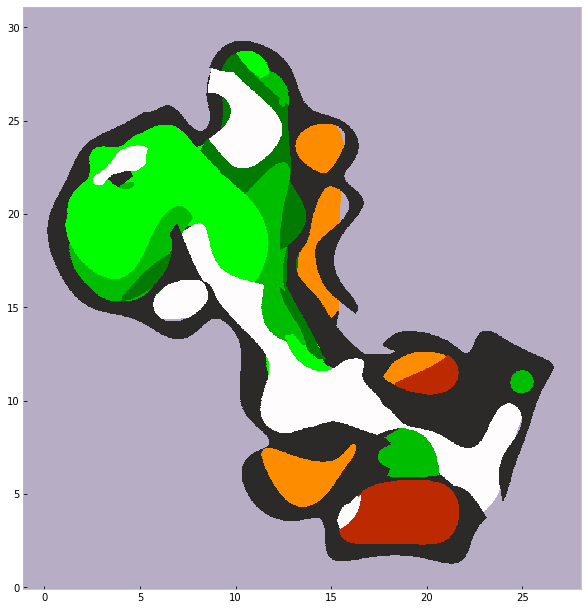

In [33]:
Z  = Z.reshape(grid.shape[1:])
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);